# Batch Size Optimisation

Neural networks are trained using gradient descent where the estimate of the error used to
update the weights is calculated based on a subset of the training dataset. The number of
examples from the training dataset used in the estimate of the error gradient is called the batch
size and is an important hyperparameter that influences the dynamics of the learning algorithm

This work references the following sources:
- http://www.manning.com/books/deep-learning-with-python
- https://machinelearningmastery.com/category/better-deep-learning
- https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9


The number of training examples used in the estimate of the error gradient is a hyperparameter
for the learning algorithm called the batch size, or simply the *batch*. A batch size of 32 means
that 32 samples from the training dataset will be used to estimate the error gradient before
the model weights are updated. One training epoch means that the learning algorithm has
made one pass through the training dataset (using every example once), where examples were
separated into randomly selected batch size groups

- **Batch Gradient Descent**. Batch size is set to the total number of examples in the
training dataset.
- **Stochastic Gradient Descent**. Batch size is set to one.
- **Minibatch Gradient Descent**. Batch size is set to more than one and less than the
total number of examples in the training dataset

In [54]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Batch Size Case Study

Use gradient descent batch size to control learning with a MLP on a multiclass classification problem.  Generate a dataset that is not linearily seperable, using *make_blobs()* with standard devaition of 2 


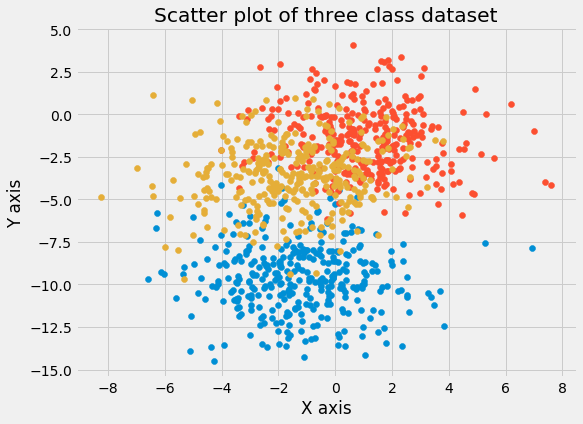

In [55]:
#gen 2d dataset
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)

fig,ax = plt.subplots(figsize=(8,6))

#y contains class label,X is 2d points
for class_val in range(3):
    row_ix = np.where(y==class_val)
    ax.scatter(X[row_ix,0],X[row_ix,1])
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("Scatter plot of three class dataset");  

In [56]:
#one hot encode target
print("class labels are {}".format(np.unique(y)))
y = to_categorical(y)
y.shape

class labels are [0 1 2]


(1000, 3)

In [57]:
#split into train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=2)
print("X_train has {} cols and {} rows".format(X_train.shape[0],X_train.shape[1]))
print("X_test has {} cols and {} rows".format(X_test.shape[0],X_test.shape[1]))
print("y_train has {} cols and {} rows".format(y_train.shape[0],y_train.shape[1]))
print("y_test has {} cols and {} rows".format(y_test.shape[0],y_test.shape[1]))

X_train has 500 cols and 2 rows
X_test has 500 cols and 2 rows
y_train has 500 cols and 3 rows
y_test has 500 cols and 3 rows


Define an MLP model with an input layer that expects two input variables, for the
two variables in the dataset. The model will have a single hidden layer with 50 nodes and a
rectified linear activation function and He random weight initialization. Finally, the output layer
has 3 nodes in order to make predictions for the three classes and a softmax activation function.

In [58]:
#define the model
model = Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))

### MLP Fit with Batch Gradient Descent 

Optimize the model with stochastic gradient descent and use categorical cross-entropy
to calculate the error of the model during training. Use **batch gradient
descent, meaning that the batch size will be set to the size of the training dataset.** The model
will be fit for 200 training epochs and the test dataset will be used as the validation set in order
to monitor the performance of the model on a holdout set during training. The effect will be
more time between weight updates and we would expect faster training than other batch sizes,
and more stable estimates of the gradient, which should result in a more stable performance of
the model during training.

In [59]:
#compile the model
opt = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
#fit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,verbose=0,batch_size=len(X_train))

In [60]:
_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.796, Test: 0.828


In [61]:
#import timeit
#start_time = timeit.default_timer()
#elapsed = timeit.default_timer() - start_time

A line plot is created showing the train and test set accuracy of the model for each training
epoch. These learning curves provide an indication of three things: how quickly the model
learns the problem, how well it has learned the problem, and how noisy the updates were to the
model during training.

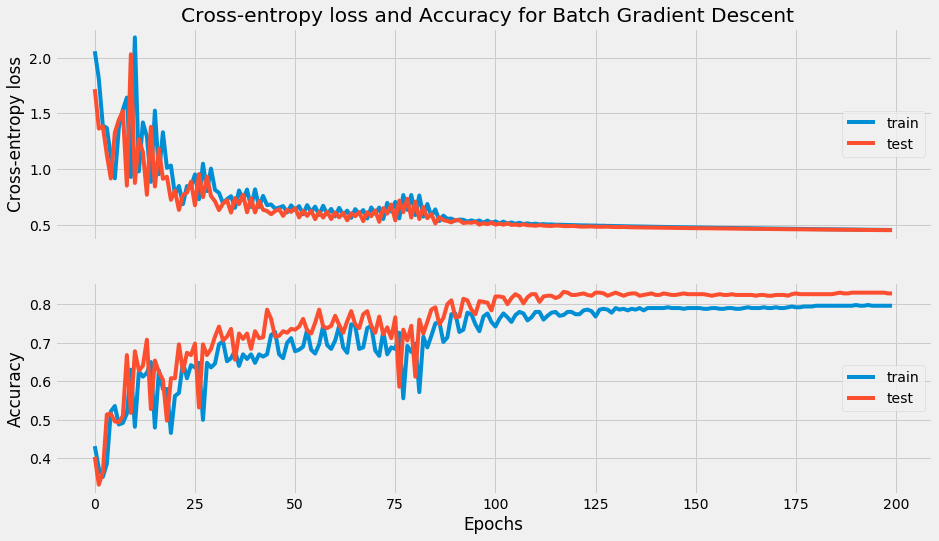

In [62]:
fig, ax_array = plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

#loss learning curuves
ax1.set_title('Cross-entropy loss and Accuracy for Batch Gradient Descent  ')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.set_ylabel('Cross-entropy loss')
ax1.legend(loc='center right');

#accuracy curves
#ax2.set_title('Accuracy')
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='test')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='center right');
ax2.set_xlabel('Epochs');

Model is slow to learn the problem, converging after 100 epochs

### MLP Fit with Stochastic Gradient Descent

Update using Stochastic Gradient Descent by setting batch size = 1.  Stochastic gradient descent requires that the model make a prediction and have the weights
updated for each training example. This has the effect of dramatically slowing down the training
process as compared to batch gradient descent. The expectation of this change is that the
model learns faster (e.g. in terms of the learning curve) and that changes to the model are noisy,
resulting, in turn, in noisy performance over training epochs.


Train: 0.508, Test: 0.522


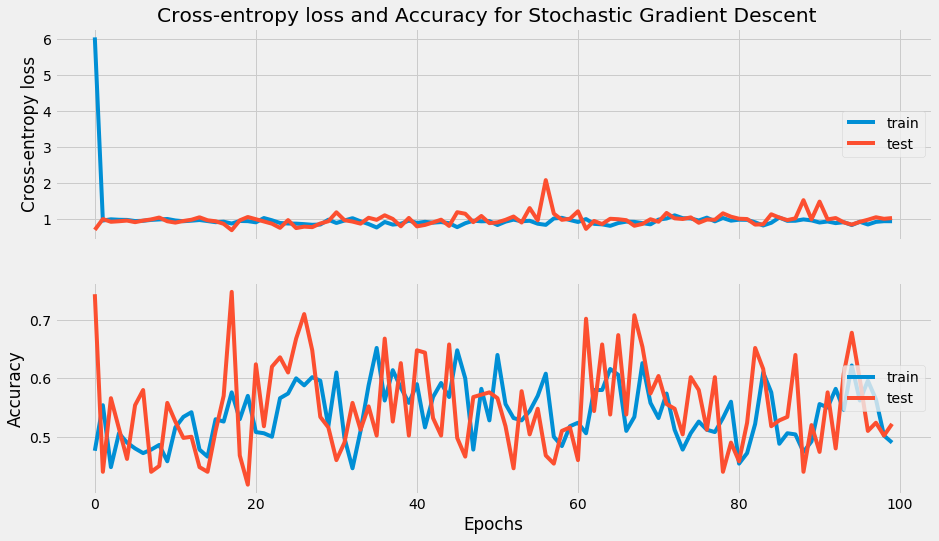

In [63]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#fit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=0,batch_size=1)

_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
                    
fig, ax_array = plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

#loss learning curuves
ax1.set_title('Cross-entropy loss and Accuracy for Stochastic Gradient Descent  ')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.set_ylabel('Cross-entropy loss')
ax1.legend(loc='center right');

#accuracy curves
#ax2.set_title('Accuracy')
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='test')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='center right');
ax2.set_xlabel('Epochs');

Performance was similar between the train and test sets, around
50% accuracy, but was dramatically worse (about 30 percentage points) than using batch
gradient descent. For this problem and the chosen model and model configuration,
stochastic (online) gradient descent is not appropriate.  Also much slower to train that batch gradient descent.

The plot shows the unstable nature of the training process with the chosen
configuration. The poor performance and erratic changes to the model suggest that the learning
rate used to update weights after each training example may be too large and that a smaller
learning rate may make the learning process more stable

Try by re-running the model fit with stochastic gradient descent and a smaller
learning rate. Drop the learning rate by an order of magnitude from 0.01
to 0.001.

Train: 0.816, Test: 0.840


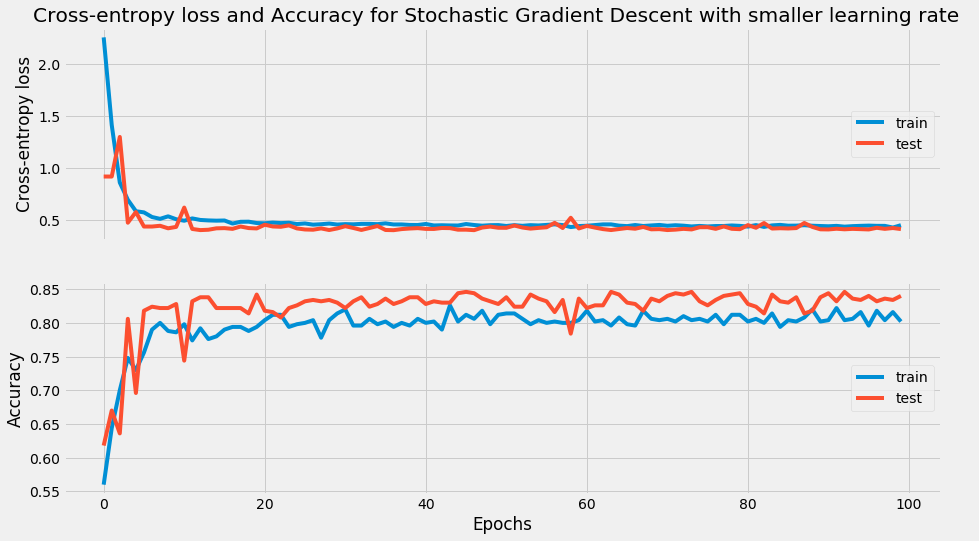

In [64]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#fit the model using SGD
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=0,batch_size=1)

_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
                    
fig, ax_array = plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

#loss learning curuves
ax1.set_title('Cross-entropy loss and Accuracy for Stochastic Gradient Descent with smaller learning rate  ')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.set_ylabel('Cross-entropy loss')
ax1.legend(loc='center right');

#accuracy curves
#ax2.set_title('Accuracy')
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='test')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='center right');
ax2.set_xlabel('Epochs');

Performance on train and test sets is much better with a smaller learning rate.  From the plot the model learns the problem much more rapidly than batch gradient descent, approaching 80% accuracy after 25 epochs as opposed to 100 epochs with batch descent.  With batch gradient descent   100 epochs involved 100 estimates of error and 100 weight updates.  In stochastic gradient descent 25 epochs involved (500 x 25) 12,500 weight updates, providing much more (noisy) feedback about model training.  Stochastic gradient descent results in noisy updates opposed to batch gradient descent where performance is stablised because the model has converged. 

More noisy updates to the model require a smaller learning rate, whereas less noisy more accurate estimates of the error gradient may be applied to the model more liberally. We
can summarize this as follows:
 - Batch Gradient Descent: Use a relatively larger learning rate and more training epochs.
 - Stochastic Gradient Descent: Use a relatively smaller learning rate and fewer training epochs.

Mini-batch gradient descent provides an alternative approach.

### MLP Fit With Minibatch Gradient Descent
An alternative to using stochastic gradient descent and tuning the learning rate is to hold the
learning rate constant and to change the batch size. We vary the accuracy of the gradient based on the number of samples used to
estimate it. Holding the learning rate at 0.01 as we did with batch gradient descent, set
the batch size to 32, a widely adopted default batch size.

Train: 0.818, Test: 0.826


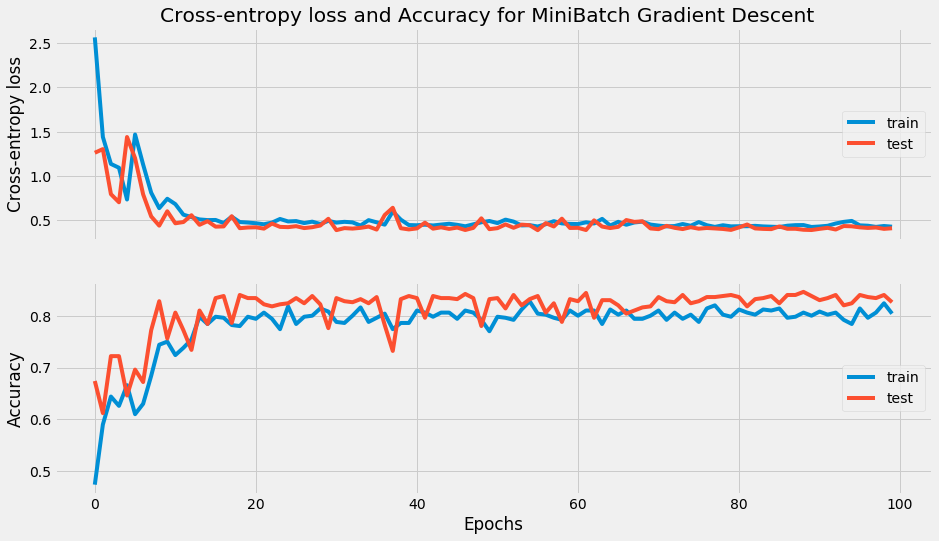

In [65]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model with batch size = 32 Mini batch gradient descent
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#fit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=0,batch_size=32)

_,train_acc = model.evaluate(X_train,y_train,verbose=0)
_,test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
                    
fig, ax_array = plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

#loss learning curuves
ax1.set_title('Cross-entropy loss and Accuracy for MiniBatch Gradient Descent  ')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.set_ylabel('Cross-entropy loss')
ax1.legend(loc='center right');

#accuracy curves
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='test')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='center right');
ax2.set_xlabel('Epochs');

MiniBatch GD similar performance on both train and test sets, comparable
with batch gradient descent and stochastic gradient descent after reducing the learning rate.  The line plot shows the dynamics of both stochastic and batch gradient descent. Specifically,
the model learns fast and has noisy updates but also stabilizes more towards the end of the run,
more so than stochastic gradient descent. Holding learning rate constant and varying the batch
size allows you to dial in the best of both approaches.

The line plot shows the dynamics of both stochastic and batch gradient descent. Specifically,
the model learns fast and has noisy updates but also stabilizes more towards the end of the run,
more so than stochastic gradient descent. Holding learning rate constant and varying the batch
size us to dial in the best of both approaches.

## Effect of Batch Size on Model Behavior

Refit the model with different batch sizes and review the impact the change in batch size
has on the speed of learning, stability during learning, and on the final result.

In [92]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=150,verbose=0, batch_size=n_batch)
    # plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('batch='+str(n_batch), pad=-40)


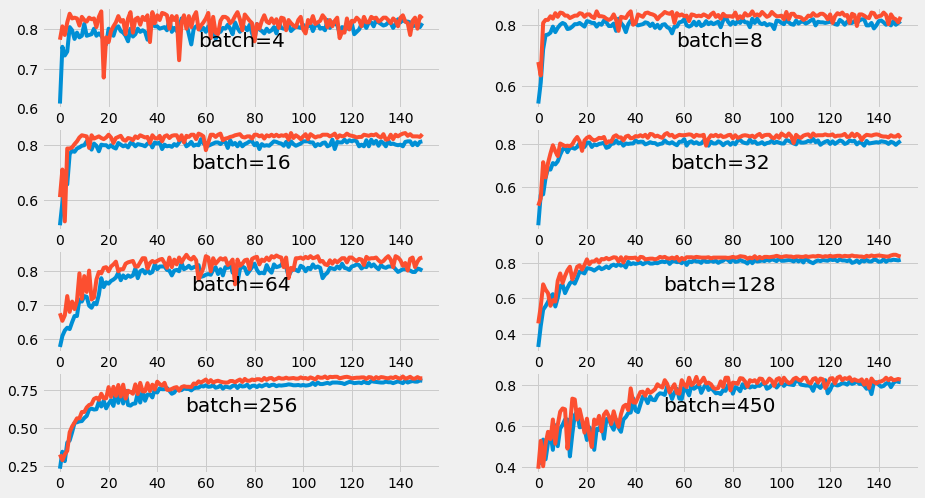

In [93]:
plt.subplots(4,2,figsize=(14,8),sharex=True,sharey=True)
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
# determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])
    # show learning curves
plt.show()



The plots show that small batch results generally in rapid learning but a volatile learning
process with higher variance in the classification accuracy. Larger batch sizes slow down the
learning process (in terms of the learning curves) but the final stages result in a convergence to
a more stable model exemplified by lower variance in classification accuracy.